Randome Forest

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


Import encoded dataframe

In [24]:
df_train = pd.read_pickle("df_train.pkl")
df_train_label = pd.read_pickle("df_train_label.pkl")
df_test = pd.read_pickle("df_test.pkl")
encodeDic = pd.read_pickle("dic.pkl")

#df_train = pd.read_pickle("df_train_onehot.pkl")
#df_train_label = pd.read_pickle("df_train_onehot_label.pkl")
#df_test = pd.read_pickle("df_test_onehot.pkl")

#df_train = pd.read_pickle("df_train_onehot_nodrop.pkl")
#df_train_label = pd.read_pickle("df_train_onehot_nodrop_label.pkl")
#df_test = pd.read_pickle("df_test_onehot_nodrop.pkl")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b4ca550>]],
      dtype=object)

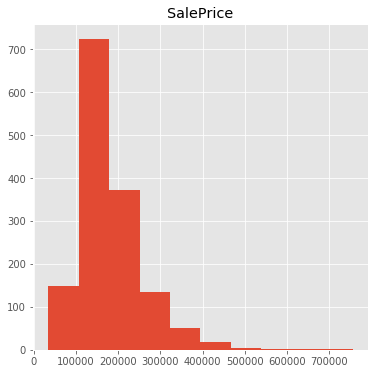

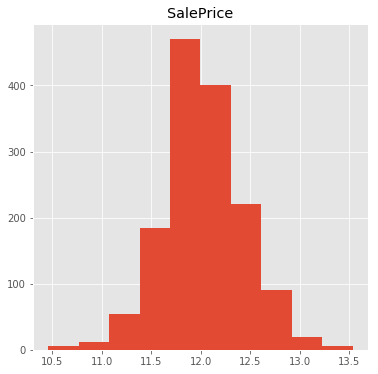

In [25]:
df_train_label = df_train_label.astype(int)
df_train_label_log = np.log( df_train_label )
df_train_label.hist()
df_train_label_log.hist()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train_label_log, test_size=0.2, random_state=123)

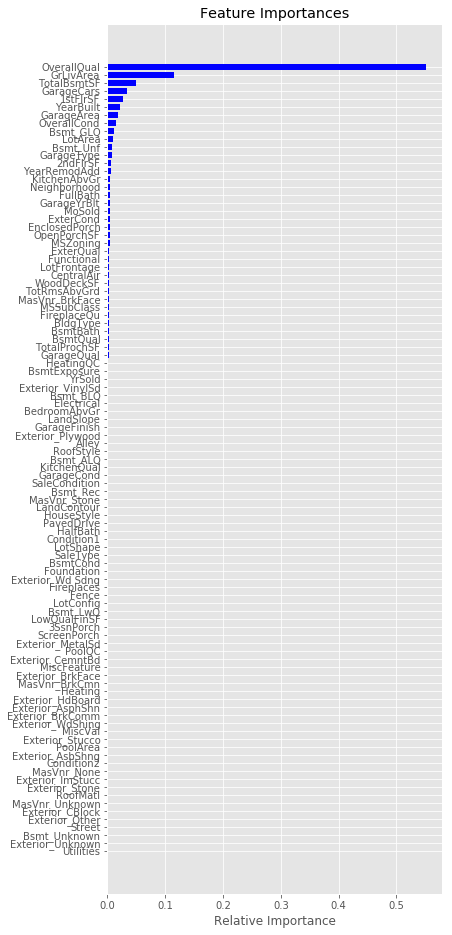

<Figure size 432x1152 with 0 Axes>

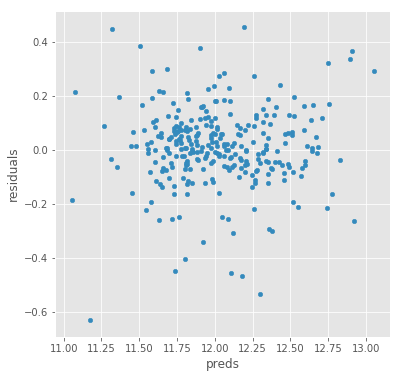

In [27]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

plt.rcParams['figure.figsize'] = (6.0, 16.0)
features= df_train.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

plt.figure()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
preds = y_test.copy()
preds["preds"] = model_rf.predict(X_test)
preds["residuals"] = preds["SalePrice"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [28]:
import pickle
with open('rf.pkl', 'wb') as handle:
    pickle.dump(model_rf, handle, protocol=pickle.HIGHEST_PROTOCOL)